In [1]:
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Read Image path to the test images

In [3]:
#Relative path to the test images in the "Test" folder
img_path = '/content/drive/MyDrive/Colab Notebooks/Data/test/crack/test_crack.jpg'
img_path_2 = '/content/drive/MyDrive/Colab Notebooks/Data/test/missing-head/test_missinghead.jpg'
img_path_3 = '/content/drive/MyDrive/Colab Notebooks/Data/test/paint-off/test_paintoff.jpg'

#Predefined Class label messages and labels
classlabelmsgs = ['A crack is present in the image','Missing Head is present in the image','Paint-off is present in the image']
classlabels = ['crack','missing-head','paint-off']

#Load model from the saved model path
model_path = '/content/drive/MyDrive/Colab Notebooks/Data/saved_trained_models/trained_model_1.h5' # The path of the saved (trained) model
model = load_model(model_path, compile=False)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Helper Functions

In [4]:
#Image transformer
def img_transformer(img_path):
    img_width, img_height = 500, 500 #Establish image size
    img = image.load_img((img_path), target_size=(img_width, img_height)) #Adjust image size to target size
    x = image.img_to_array(img) #Convert image to an array
    x = x / 255 #Apply scaling to the image array
    x = np.expand_dims(x, axis=0)
    new_image = np.vstack([x])
    return new_image

#Function that takes the maximum predicted value's location from the prediction model
def pred_class_label(class_probs):
    if class_probs.max() == class_probs[0][0]:
        return classlabelmsgs[0],classlabels[0]
    elif class_probs.max() == class_probs[0][1]:
        return classlabelmsgs[1],classlabels[1]
    else:
        return classlabelmsgs[2],classlabels[2]

#Function to retrieve the true class label from the image path
def true_class_label(img_path):
    for i in img_path.split('/'): #Splits the image path based on "/"
        if i in classlabels: #Checks if class label is in the array of class labels
            return i

Load Image and Display Predictions

In [5]:
predicting_img=img_path #change image path here ex: img_path, img_path_2
#Predict the classes of the image
class_probs = model.predict(img_transformer(predicting_img))      #Predict based on the image transformed in the function above
class_probs *= 100

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


In [6]:
predicting_img=img_path #change image path here ex: img_path, img_path_2
#Predict the classes of the image
class_probs = model.predict(img_transformer(predicting_img))      #Predict based on the image transformed in the function above
class_probs *= 100

#Create strings for each of the categories and their corresponding array locations
crack_str = str(np.around(class_probs[0][0], decimals = 1)) +'%'
missing_head_str = str(np.around(class_probs[0][1], decimals = 1)) +'%'
paint_off_str = str(np.around(class_probs[0][2], decimals = 1)) +'%'

#Read image using cv2
img = cv2.imread(predicting_img)

#Text to represent each category and their probabilities
textboxstr = "Crack:{0}\nMissing Head:{1}\nPaint-off:{2}".format(crack_str,missing_head_str,paint_off_str)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


A crack is present in the image predicted by the model


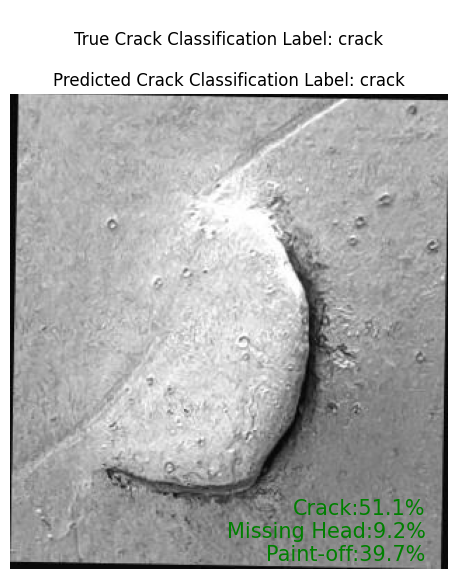

In [7]:
print(pred_class_label(class_probs)[0],'predicted by the model')
#Create figure to run the
fig = plt.figure()
ax = fig.add_subplot(111)
fig.subplots_adjust(top=1.1)

#Set title with the true label and predicted label (Call the true class and predicted class labels)
ax.set_title("""\nTrue Crack Classification Label: {0}
\nPredicted Crack Classification Label: {1}""".format(true_class_label(predicting_img),pred_class_label(class_probs)[1]))
ax.text(0.95, 0.01, textboxstr,
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='green', fontsize=15)
plt.axis("off")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


In [8]:
predicting_img=img_path_2 #change image path here ex: img_path, img_path_2, img_path_3
#Predict the classes of the image
class_probs = model.predict(img_transformer(predicting_img))      #Predict based on the image transformed in the function above
class_probs *= 100

#Create strings for each of the categories and their corresponding array locations
crack_str = str(np.around(class_probs[0][0], decimals = 1)) +'%'
missing_head_str = str(np.around(class_probs[0][1], decimals = 1)) +'%'
paint_off_str = str(np.around(class_probs[0][2], decimals = 1)) +'%'

#Read image using cv2
img = cv2.imread(predicting_img)

#Text to represent each category and their probabilities
textboxstr = "Crack:{0}\nMissing Head:{1}\nPaint-off:{2}".format(crack_str,missing_head_str,paint_off_str)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


Missing Head is present in the image predicted by the model


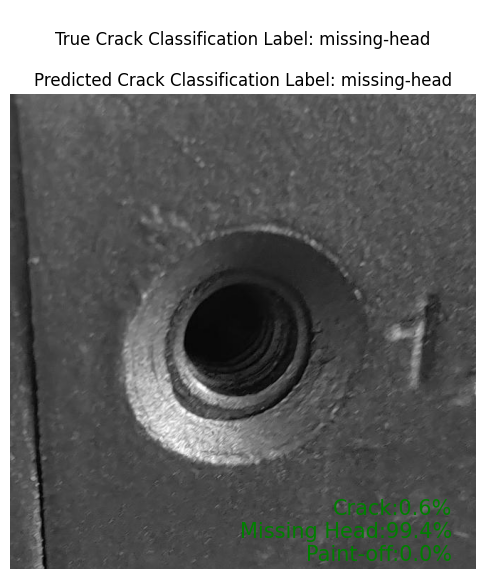

In [9]:
print(pred_class_label(class_probs)[0],'predicted by the model')
#Create figure to run the
fig = plt.figure()
ax = fig.add_subplot(111)
fig.subplots_adjust(top=1.1)

#Set title with the true label and predicted label (Call the true class and predicted class labels)
ax.set_title("""\nTrue Crack Classification Label: {0}
\nPredicted Crack Classification Label: {1}""".format(true_class_label(predicting_img),pred_class_label(class_probs)[1]))
ax.text(0.95, 0.01, textboxstr,
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='green', fontsize=15)
plt.axis("off")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


In [10]:
predicting_img=img_path_3 #change image path here ex: img_path, img_path_2, img_path_3
#Predict the classes of the image
class_probs = model.predict(img_transformer(predicting_img))      #Predict based on the image transformed in the function above
class_probs *= 100

#Create strings for each of the categories and their corresponding array locations
crack_str = str(np.around(class_probs[0][0], decimals = 1)) +'%'
missing_head_str = str(np.around(class_probs[0][1], decimals = 1)) +'%'
paint_off_str = str(np.around(class_probs[0][2], decimals = 1)) +'%'

#Read image using cv2
img = cv2.imread(predicting_img)

#Text to represent each category and their probabilities
textboxstr = "Crack:{0}\nMissing Head:{1}\nPaint-off:{2}".format(crack_str,missing_head_str,paint_off_str)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Paint-off is present in the image predicted by the model


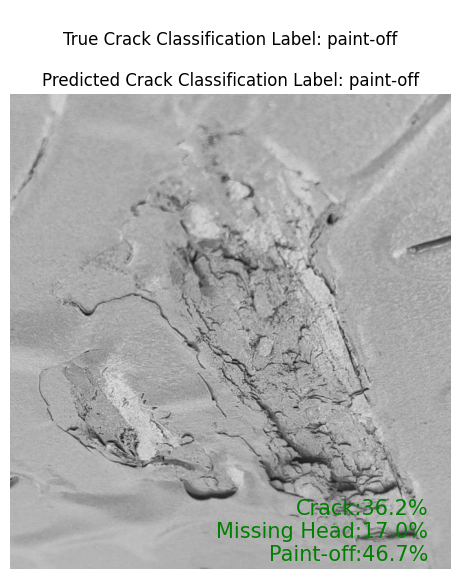

In [11]:
print(pred_class_label(class_probs)[0],'predicted by the model')
#Create figure to run the
fig = plt.figure()
ax = fig.add_subplot(111)
fig.subplots_adjust(top=1.1)

#Set title with the true label and predicted label (Call the true class and predicted class labels)
ax.set_title("""\nTrue Crack Classification Label: {0}
\nPredicted Crack Classification Label: {1}""".format(true_class_label(predicting_img),pred_class_label(class_probs)[1]))
ax.text(0.95, 0.01, textboxstr,
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='green', fontsize=15)
plt.axis("off")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
